In [367]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random as rand
img = cv2.imread('rov_pool.jpg')
cap = cv2.VideoCapture('AUV_Vid.mkv')
ret, frame = cap.read()
import lane_detection as ld

In [393]:
def my_detect_lines(img, threshold1=50,threshold2=150, apertureSize=3,minLineLength=100,maxLineGap=10):
    #gray = cv2.medianBlur(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY),41) # convert to grayscale
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    blur=cv2.medianBlur(gray,41)
    ret, thresh1=cv2.threshold(blur,100,180, cv2.THRESH_BINARY)
    new_thresh=thresh1[int(len(thresh1)/2):, :]
    edges = cv2.Canny(new_thresh, 35, 67) # detect edges using edge intensity of the gray version of the image.jpg,
    #  it detects the edges by establishing a color gradient along edges and using those gradients to define thin lines where edges should be,
    #  whether or not they are edges is then defined by whether the intensity of the shift in gradient is above or below certain thresholds
    #  that you define when calling Canny, so the second value you input is defined as the minimum threshold for gradient intensity,
    #  which if any edges have an intensity lower than that they are discarded, the second threshold is the maximum intensity, 
    #  which establishes that for any edges with a greater gradient intensity they are instantly accepted as edges, 
    #  and if some edges are in-between the thresholds, they are defined as edges or not based on whether they touch pixels that are a part of the edges.
    #  for the parameters I would suggest anywhere from 55-80 to 50-110
    lines=[]
    
    bad_lines = cv2.HoughLinesP(edges,4,np.pi/120,30,minLineLength=250,maxLineGap=50,) # detect lines, 10, np.pi/210,50,250,20
    # takes in edges, an array of lines mapped in cartesian space onto the image resolution
    # also takes in Rho which is distance resolution
    # then it takes in Theta which is angular pixel resolution, note: only seems to work for pi/(k*30) values, where k is some natural number, idk why
    # then it takes in a threshold for lines it will show, only lines that get more than the thresholds votes will be shown. suggest to be 10
    # then it takes in minLineLength which states the minimum length required in pixels for a line to be shown
    # then it takes in maxLineGap which states the maximum distance between two lines in points in a line for those points to be considered apart of a single line


    if bad_lines is not None:
        for nested1 in bad_lines:
                nested=nested1[0]
                lines.append(nested.tolist())
        return(lines)
    else:
        #raise ValueError("No Lines!")
        pass

In [369]:
my_detect_lines(img)

[[769, 3, 928, 539],
 [890, 72, 1155, 531],
 [1392, 1, 1663, 114],
 [955, 186, 1151, 526]]

In [370]:
def half_image(image):
    return(image[int(len(image)/2):, :])

In [371]:
my_detect_lines(img)

[[769, 3, 928, 539],
 [890, 72, 1155, 531],
 [1392, 1, 1663, 114],
 [955, 186, 1151, 526]]

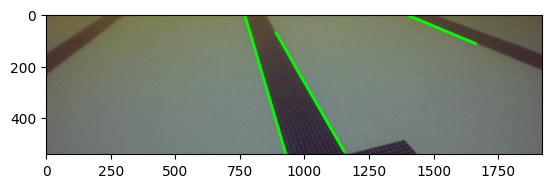

In [372]:
plt.imshow(draw_lines(img[int(len(thresh1)/2):, :],my_detect_lines(img)))

In [373]:
ret, thresh2 = cv2.threshold(cv2.medianBlur(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY),35),100,180,cv2.THRESH_BINARY)

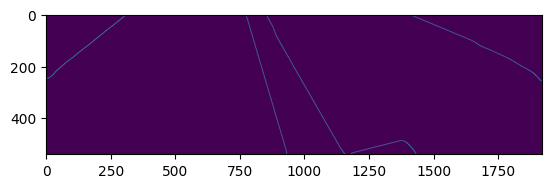

In [374]:
plt.imshow(cv2.Canny(thresh2[int(len(thresh2)/2):, :],35,67))

In [375]:
int(len(thresh2[0])/2)

960

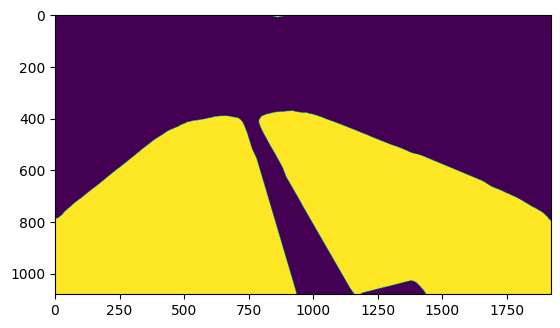

In [376]:
plt.imshow(thresh2)

In [377]:
a=cv2.medianBlur(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY),41)

In [378]:
hsv=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [379]:
new_img=cv2.medianBlur(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY),41)

In [380]:
ret, thresh1= cv2.threshold(new_img,100,180, cv2.THRESH_BINARY)

In [381]:
(cv2.HoughLinesP(cv2.Canny(thresh1, 35,67),10,np.pi/210,50,minLineLength=270,maxLineGap=20,))

array([[[ 43, 755, 379, 487]],

       [[780, 561, 892, 941]],

       [[111, 701, 384, 484]]], dtype=int32)

In [382]:
def get_slopes_intercepts(lines):
    slopes=[]
    intercepts=[]
    easy_return_value=[]
    slope=0
    if lines is not None:
        for line in lines:
            if line is not None and len(line) != 0:
                x1=line[0]
                y1=line[1]
                x2=line[2]
                y2=line[3]
                if (x2-x1)!=0:
                    slope=(y2-y1)/(x2-x1)
                else:
                    slope=(y2-y1)/.00000000001
                if slope !=0:
                    slopes.append(slope)
                    intercepts.append((-y1/slope)+x1)
                else: 
                    pass
                #easy_return_value.append([slope,(-y1/slope)+x1])
        
        return [slopes,intercepts]


In [383]:
def distance(two_points):
    return(np.sqrt(abs(two_points[0][0]-two_points[0][1])**2 + abs(two_points[1][0]-two_points[1][1])**2))

In [386]:
def draw_lanes(img, lanes):
    for lane in lanes:
        color=ld.get_color()
        for line in lane:
            x1,y1,x2,y2= line
            cv2.line(img,(x1,y1),(x2,y2),color,10)
    return(img)

In [394]:
try:
    a=0
    b=150
    ret,frame = cap.read()
    while ret:
        if a%b==0:
            plt.imshow(draw_lanes(half_image(frame),detect_lanes(my_detect_lines(frame))))
            plt.show()
            #(recommend_direction(detect_lanes(my_detect_lines(frame)), frame))
        a+=1
        ret,frame = cap.read()
except TypeError or IndexError:
    a=0
    b=60
    ret,frame = cap.read()
    while ret:
        if a%b==0:
            plt.imshow(draw_lanes(half_image(frame),detect_lanes(my_detect_lines(frame))))
            plt.show()
        a+=1
        ret,frame = cap.read()

KeyboardInterrupt: 

In [ ]:
ret,frame = cap.read()

In [ ]:
a=0
b=200

while ret:
    if a%200==0:
        

In [ ]:

get_lane_center(detect_lanes(my_detect_lines(img)))

[]

In [ ]:
(detect_lanes(my_detect_lines(img)))

[]

In [ ]:
my_detect_lines(img)

[[839, 519, 1032, 864], [1189, 461, 1913, 758], [781, 578, 893, 961]]